# Preferential Voting Tools - Overview

In [158]:
# !pip3 install pref_voting

import pref_voting
print(pref_voting.__version__) # should be 1.14.4

1.14.4


## Election Types

In [132]:
from pref_voting.profiles import Profile

prof = Profile(
    [[2, 1, 0, 3], [3, 2, 0, 1], [3, 1, 0, 2]], # linear rankings
    rcounts=[2, 1, 3], # number of voters for each ranking
    cmap={0: 'a', 1: 'b', 2: 'c', 3: 'd'} # candidate mapping
    )

prof.display()

+---+---+---+
| 2 | 1 | 3 |
+---+---+---+
| c | d | d |
| b | c | b |
| a | a | a |
| d | b | c |
+---+---+---+


In [133]:
from pref_voting.profiles_with_ties import ProfileWithTies

prof = ProfileWithTies(
    [{0:1, 1:1}, {0:1, 1:1, 2:2},  {0:3, 1:1, 2:2}, {0:1, 3:0, 2:1}], # rankings with ties
    rcounts=[2, 2, 1, 3], # number of voters for each ranking
    candidates=[0, 1, 2, 3], # candidates in the election
    cmap={0: 'a', 1: 'b', 2: 'c', 3: 'd'} # candidate map
    )

prof.display()

+-----+-----+---+-----+
|  2  |  2  | 1 |  3  |
+-----+-----+---+-----+
| a b | a b | b |  d  |
|     |  c  | c | a c |
|     |     | a |     |
|     |     |   |     |
+-----+-----+---+-----+


In [134]:
from pref_voting.utility_profiles import UtilityProfile

uprof = UtilityProfile([
    {0:1.0, 1: 0.5, 2: 1.25}, # utilities for each candidate
    {0:-0.5, 1: 9.5, 2: 1.05},
    {0:3.0, 1: -2.0, 2: 1.0},
    {0:0.5, 1: 0.0, 2: 3.0}
    ])

uprof.display()

  Voter     0     1     2
-------  ----  ----  ----
      1   1     0.5  1.25
      2  -0.5   9.5  1.05
      3   3    -2    1
      4   0.5   0    3


In [135]:
from pref_voting.grade_profiles import GradeProfile

gprof = GradeProfile([
    {0:1, 1:3, 2:3}, # grades for each candidate
    {0:3, 1:2, 2:1},
    {0:1, 1:1, 2:1},
],
gcounts=[1, 2, 1], # number of voters for each grade assignment
grades=[0, 1, 2, 3], # the grades in the profile
cmap = {0: 'a', 1: 'b', 2: 'c'} # candidate mapping
)

gprof.display(show_totals=True)


      1    2    1    Sum    Median
--  ---  ---  ---  -----  --------
a     1    3    1      8         1
b     3    2    1      8         2
c     3    1    1      6         1


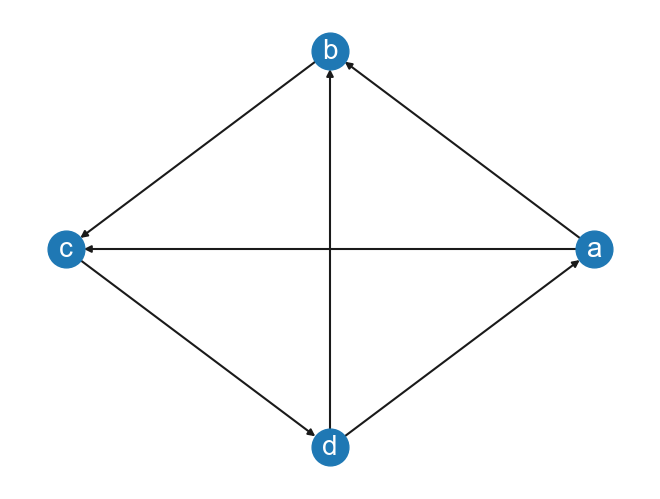

In [136]:
from pref_voting.weighted_majority_graphs import MajorityGraph

mg = MajorityGraph(
    [0, 1, 2, 3], # candidates in the election
    [(0, 1), (1, 2), (0, 2), (3, 0), (3, 1), (2, 3)], # edges in the majority graph
    cmap={0: 'a', 1: 'b', 2: 'c', 3: 'd'} # candidate mapping
    )

mg.display()

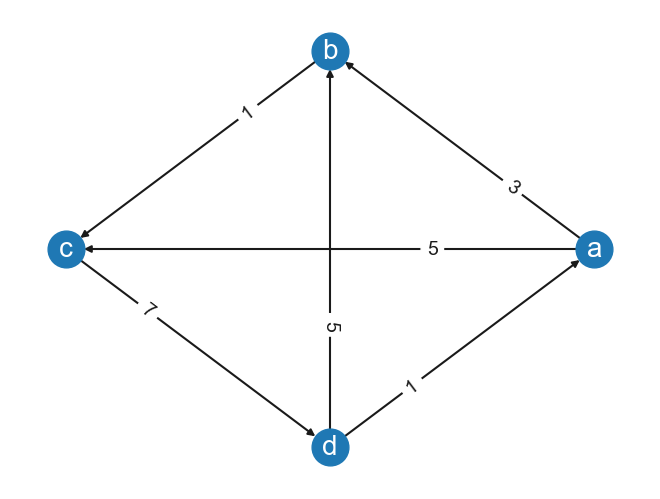

In [137]:
from pref_voting.weighted_majority_graphs import MarginGraph
mg = MarginGraph(
    [0, 1, 2, 3], # candidates in the election
    [(0, 1, 3), (1, 2, 1), (0, 2, 5), (3, 0, 1), (3, 1, 5), (2, 3, 7)], # weighted edges in the margin graph
        cmap={0: 'a', 1: 'b', 2: 'c', 3: 'd'} # candidate mapping
)

mg.display()

+---+---+---+
| 2 | 2 | 3 |
+---+---+---+
| 2 | 3 | 3 |
| 1 | 2 | 1 |
| 0 | 0 | 0 |
| 3 | 1 | 2 |
+---+---+---+


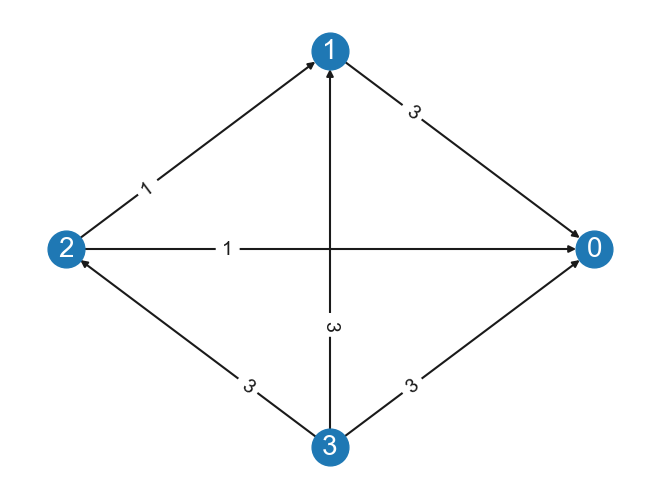

In [138]:
prof = Profile([
    [2, 1, 0, 3], 
    [3, 2, 0, 1], 
    [3, 1, 0, 2]], 
    rcounts=[2, 2, 3])

prof.display()

mg = prof.margin_graph() # the same syntax works for a ProfileWithTies object

mg.display()

# alternatively, prof.display_margin_graph()

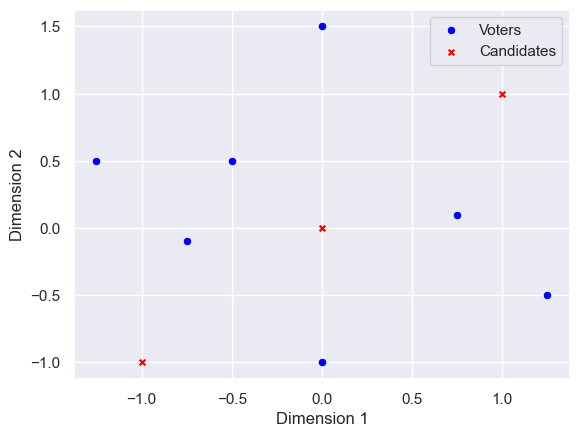

In [139]:
from pref_voting.spatial_profiles import SpatialProfile

sprof = SpatialProfile(
    cand_pos={0:(0, 0), 1: (1, 1), 2:(-1, -1)}, # candidate positions
    voter_pos={0:(0, 1.5), 1:(-1.25, 0.5), 2:(0.75, 0.1), 3:(0, -1), 4:(1.25, -0.5), 5:(-0.75, -0.1), 6:(-0.5, 0.5)}, # voter positions
    candidate_types={0:'L', 1:'L', 2:'C' }) # assignment of candidates to types (or parties)

# sprof.display() # display the spatial profile
sprof.view()


In [140]:
prof = Profile(
    [[0, 1, 2], [2, 1, 0], [1, 2, 0]],
    rcounts=[2, 1, 4], 
    cmap={0: 'a', 1: 'b', 2: 'c'})

print(prof.to_latex())

\begin{tabular}{ccc}
$2$ & $1$ & $4$\\\hline 
$a$ & $c$ & $b$\\ 
$b$ & $b$ & $c$\\ 
$c$ & $a$ & $a$
\end{tabular}


In [141]:
prof = Profile([
    [2, 1, 0, 3], 
    [3, 2, 0, 1], 
    [3, 1, 0, 2]], 
    rcounts=[2, 2, 3])

prof.display()

print(f"The margin of 1 over 3 is {prof.margin(1, 3)}")
print(f"The Plurality scores are {prof.plurality_scores()}")
print(f"The Copeland scores are {prof.copeland_scores()}")
print(f"The Borda scores are {prof.borda_scores()}")
print(f"The Condorcet winner is {prof.condorcet_winner()}")
print(f"The weak Condorcet winner is {prof.weak_condorcet_winner()}")
print(f"The Condorcet loser is {prof.condorcet_loser()}")
print(f"The profile is uniquely weighted: {prof.is_uniquely_weighted()}")



+---+---+---+
| 2 | 2 | 3 |
+---+---+---+
| 2 | 3 | 3 |
| 1 | 2 | 1 |
| 0 | 0 | 0 |
| 3 | 1 | 2 |
+---+---+---+
The margin of 1 over 3 is -3
The Plurality scores are {0: 0, 1: 0, 2: 2, 3: 5}
The Copeland scores are {0: -3.0, 1: -1.0, 2: 1.0, 3: 3.0}
The Borda scores are {0: 7, 1: 10, 2: 10, 3: 15}
The Condorcet winner is 3
The weak Condorcet winner is [3]
The Condorcet loser is 0
The profile is uniquely weighted: False


## Converting Between Election Types

In [144]:
mg = MarginGraph([0, 1, 2], [(0, 1, 3), (1, 2, 1), (2, 0, 5)])

debord_prof = mg.debord_profile()
debord_prof.display()

min_prof = mg.minimal_profile()
min_prof.display()


+---+---+---+---+---+
| 1 | 1 | 3 | 3 | 1 |
+---+---+---+---+---+
| 0 | 2 | 2 | 1 | 0 |
| 1 | 0 | 0 | 2 | 1 |
| 2 | 1 | 1 | 0 | 2 |
+---+---+---+---+---+
+---+---+---+
| 2 | 3 | 4 |
+---+---+---+
| 0 | 1 | 2 |
| 1 | 2 | 0 |
| 2 | 0 | 1 |
+---+---+---+


In [145]:
from pref_voting.utility_functions import *
from pref_voting.generate_spatial_profiles import generate_spatial_profile

sprof = generate_spatial_profile(4, 101, 2)

print("Using the linear utility function:")
uprof = sprof.to_utility_profile(utility_function=linear_utility)
uprof.to_ranking_profile().anonymize().display()

print("Using the quadratic utility function:")
uprof = sprof.to_utility_profile(utility_function=quadratic_utility)
uprof.to_ranking_profile().anonymize().display()

print("Using the RM utility function:")
uprof = sprof.to_utility_profile(utility_function=rm_utility)
uprof.to_ranking_profile().anonymize().display()

print("Using the mixed RM utility function:")
uprof = sprof.to_utility_profile(utility_function=mixed_rm_utility)
uprof.to_ranking_profile().anonymize().display()

print("Using the Matthews utility function:")
uprof = sprof.to_utility_profile(utility_function=matthews_utility)
uprof.to_ranking_profile().anonymize().display()

print("Using the Shepsle utility function:")
uprof = sprof.to_utility_profile(utility_function=shepsle_utility)
uprof.to_ranking_profile().anonymize().display()

print("Using the city block utility function:")
uprof = sprof.to_utility_profile(utility_function=city_block_utility)
uprof.to_ranking_profile().anonymize().display()


Using the linear utility function:
+---+----+---+----+---+----+---+---+---+---+
| 3 | 21 | 7 | 32 | 3 | 15 | 5 | 9 | 5 | 1 |
+---+----+---+----+---+----+---+---+---+---+
| 1 | 2  | 1 | 2  | 0 | 0  | 3 | 1 | 0 | 1 |
| 3 | 1  | 0 | 0  | 2 | 1  | 1 | 0 | 1 | 2 |
| 0 | 0  | 2 | 1  | 1 | 3  | 0 | 3 | 2 | 0 |
| 2 | 3  | 3 | 3  | 3 | 2  | 2 | 2 | 3 | 3 |
+---+----+---+----+---+----+---+---+---+---+
Using the quadratic utility function:
+---+----+---+----+---+----+---+---+---+---+
| 3 | 21 | 7 | 32 | 3 | 15 | 5 | 9 | 5 | 1 |
+---+----+---+----+---+----+---+---+---+---+
| 1 | 2  | 1 | 2  | 0 | 0  | 3 | 1 | 0 | 1 |
| 3 | 1  | 0 | 0  | 2 | 1  | 1 | 0 | 1 | 2 |
| 0 | 0  | 2 | 1  | 1 | 3  | 0 | 3 | 2 | 0 |
| 2 | 3  | 3 | 3  | 3 | 2  | 2 | 2 | 3 | 3 |
+---+----+---+----+---+----+---+---+---+---+
Using the RM utility function:
+----+---+----+----+----+---+---+---+---+---+---+
| 22 | 9 | 17 | 29 | 14 | 2 | 2 | 2 | 1 | 2 | 1 |
+----+---+----+----+----+---+---+---+---+---+---+
| 3  | 2 | 2  | 2  | 3  | 

## Generating Election Data

In [156]:
from pref_voting.generate_profiles import generate_profile

print("Impartial culture:")
prof = generate_profile(3, 11) # default is the impartial culture
prof.anonymize().display()

print("Impartial anonymous culture:")
prof = generate_profile(3, 11, prob_model="IAC") # impartial anonymous culture
prof.anonymize().display()

print("Mallows model:")
prof = generate_profile(3, 11, prob_model="mallows", phi=0.8, normalize_phi=True) 
prof.anonymize().display()

print("Urn model:")
prof = generate_profile(3, 11, prob_model="urn", alpha=3) 
prof.anonymize().display()

print("Euclidean model:")
prof = generate_profile(3, 11, prob_model="euclidean", num_dims=5) 
prof.anonymize().display()

print("Single-peaked model:")
prof = generate_profile(3, 11, prob_model="single_peaked_conitzer", num_dims=5) 
prof.anonymize().display()

print("Plackett-Luce model:")
prof = generate_profile(3, 11, prob_model="plackett_luce", alphas=[3, 1, 1]) 
prof.anonymize().display()


Impartial culture:
+---+---+---+---+---+
| 2 | 2 | 3 | 2 | 2 |
+---+---+---+---+---+
| 0 | 1 | 2 | 2 | 0 |
| 1 | 2 | 1 | 0 | 2 |
| 2 | 0 | 0 | 1 | 1 |
+---+---+---+---+---+
Impartial anonymous culture:
+---+---+---+---+---+
| 3 | 1 | 2 | 3 | 2 |
+---+---+---+---+---+
| 1 | 2 | 1 | 0 | 0 |
| 0 | 1 | 2 | 1 | 2 |
| 2 | 0 | 0 | 2 | 1 |
+---+---+---+---+---+
Mallows model:
+---+---+---+---+
| 3 | 4 | 2 | 2 |
+---+---+---+---+
| 0 | 0 | 2 | 1 |
| 1 | 2 | 1 | 0 |
| 2 | 1 | 0 | 2 |
+---+---+---+---+
Urn model:
+---+---+---+---+---+
| 2 | 2 | 2 | 3 | 2 |
+---+---+---+---+---+
| 1 | 0 | 2 | 0 | 2 |
| 2 | 2 | 1 | 1 | 0 |
| 0 | 1 | 0 | 2 | 1 |
+---+---+---+---+---+
Euclidean model:
+---+---+---+---+---+
| 3 | 1 | 4 | 2 | 1 |
+---+---+---+---+---+
| 2 | 0 | 2 | 0 | 1 |
| 0 | 2 | 1 | 1 | 0 |
| 1 | 1 | 0 | 2 | 2 |
+---+---+---+---+---+
Single-peaked model:
+---+---+---+---+---+---+
| 4 | 3 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+---+
| 0 | 1 | 2 | 0 | 1 | 2 |
| 2 | 0 | 1 | 1 | 2 | 0 |
| 1 | 2 | 0 | 2 

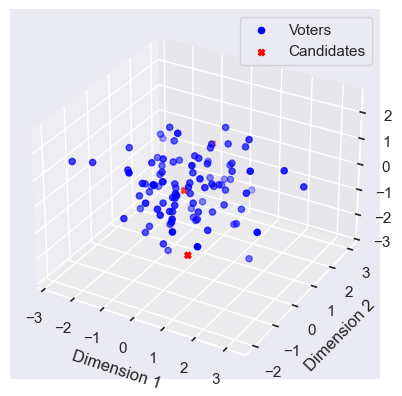

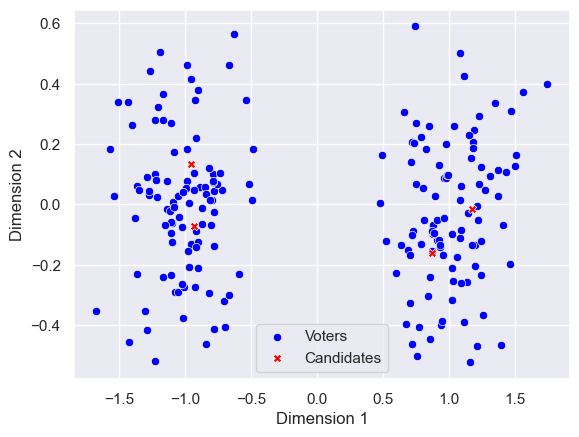

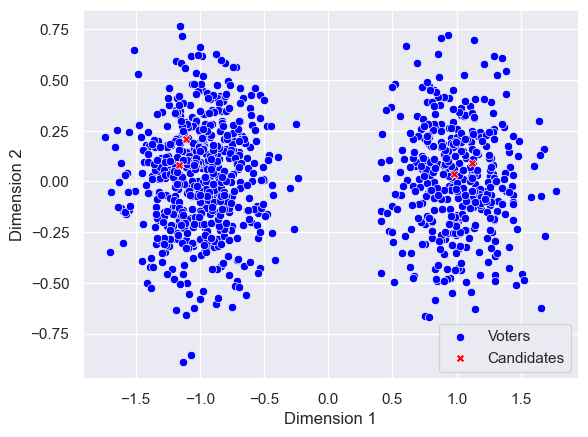

In [57]:
from pref_voting.generate_spatial_profiles import generate_spatial_profile, generate_spatial_profile_polarized, generate_spatial_profile_polarized_cands_randomly_polarized_voters, generate_covariance

sprof = generate_spatial_profile(3, 100, num_dims=3) # 3 candidates, 100 voters, 3 dimensions
sprof.view()

sprof = generate_spatial_profile_polarized(
    [((-1, 0), generate_covariance(2, 0.1, 0), 2), # 2 candidates in this cluster
     ((1, 0), generate_covariance(2, 0.1, 0), 2), # 2 candidates in this cluster 
    ],
    [((-1, 0), generate_covariance(2, 0.25, 0), 100), # 100 voters in this cluster
     ((1, 0), generate_covariance(2, 0.25, 0), 100), # 100 voters in this cluster
    ],
)
sprof.view()


sprof = generate_spatial_profile_polarized_cands_randomly_polarized_voters(
    [((-1, 0), generate_covariance(2, 0.1, 0), 2), # 2 candidates in this cluster
     ((1, 0), generate_covariance(2, 0.1, 0), 2),  # 2 candidates in this cluster
    ],
    1000, # number of voters
    [((-1, 0), generate_covariance(2, 0.25, 0), 0.6), # 60% of voters in this cluster
     ((1, 0), generate_covariance(2, 0.25, 0), 0.4)], # 40% of voters in this cluster],
)
sprof.view()


## Voting Methods

In [146]:
from pref_voting.voting_methods import *
from pref_voting.generate_profiles import generate_profile

prof = generate_profile(4, 1000)
vms = [plurality, borda, instant_runoff, instant_runoff_put, minimax, split_cycle, ranked_pairs, river]
for vm in vms: 
    print(f"The {vm.name} winners: {vm(prof)}")
    print(f"\trestricted to the candidates [1, 2, 3]: {vm(prof, curr_cands=[1, 2, 3])}")

The Plurality winners: [1]
	restricted to the candidates [1, 2, 3]: [1]
The Borda winners: [0]
	restricted to the candidates [1, 2, 3]: [1]
The Instant Runoff winners: [1]
	restricted to the candidates [1, 2, 3]: [1]
The Instant Runoff PUT winners: [1]
	restricted to the candidates [1, 2, 3]: [1]
The Minimax winners: [2]
	restricted to the candidates [1, 2, 3]: [1]
The Split Cycle winners: [2]
	restricted to the candidates [1, 2, 3]: [1]
The Ranked Pairs winners: [2]
	restricted to the candidates [1, 2, 3]: [1]
The River winners: [2]
	restricted to the candidates [1, 2, 3]: [1]


## Axioms

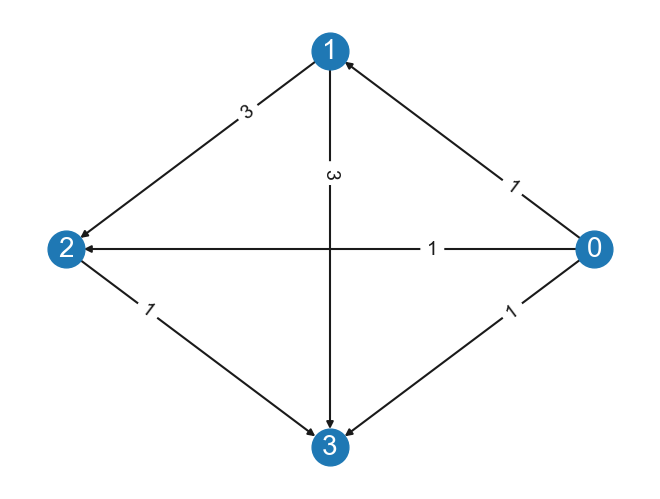

Profile([[0, 1, 2, 3], [1, 2, 3, 0], [0, 1, 3, 2]], rcounts=[1, 1, 1], cmap={0: '0', 1: '1', 2: '2', 3: '3'})
The Condorcet winner 0 is not the unique winner: 
Borda winner is {1}


In [147]:
from pref_voting.dominance_axioms import *

vm = borda
num_cands = 4
num_voters = 3
num_trials = 1000

for t in range(num_trials): 
    prof = generate_profile(num_cands, num_voters)
    if condorcet_winner.has_violation(prof, vm, only_resolute=True, verbose=True): 
        break


Immunity to Spoilers violation for Borda.
0 wins without 1 in the election and is majority preferred to 1 but both lose when 1 is included:
+---+---+---+
| 1 | 1 | 1 |
+---+---+---+
| 0 | 0 | 3 |
| 3 | 3 | 1 |
| 1 | 1 | 2 |
| 2 | 2 | 0 |
+---+---+---+
Profile([[0, 3, 1, 2], [0, 3, 1, 2], [3, 1, 2, 0]], rcounts=[1, 1, 1], cmap={0: '0', 1: '1', 2: '2', 3: '3'})


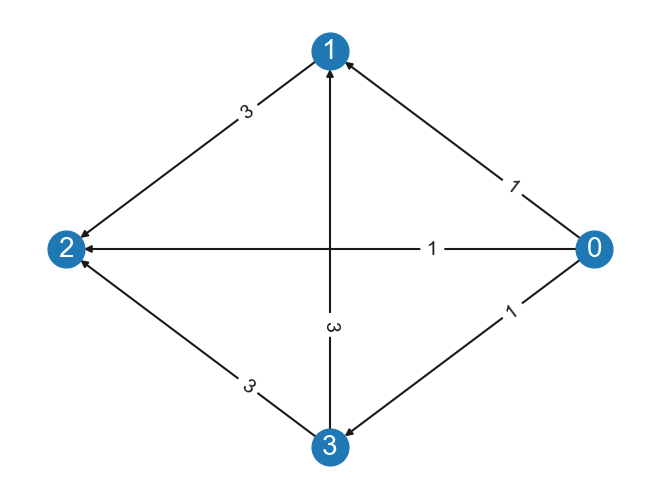

Winners in full election: [3]
Winners in election without 1: [0, 3]


In [148]:
from pref_voting.variable_candidate_axioms import *

vm = borda
num_cands = 4
num_voters = 3
num_trials = 1000

for t in range(num_trials): 
    prof = generate_profile(num_cands, num_voters)
    if immunity_to_spoilers.has_violation(prof, vm, verbose=True): 
        break

In [149]:
from pref_voting.analysis import binomial_confidence_interval

min_error = 0.05  
min_num_samples = 1000
max_num_samples = 100_000

voting_methods = [plurality,  borda,  instant_runoff]

num_candidates = 4
num_voters = 11

has_condorcet_winner = []
elect_condorcet_winner = {vm.name: [] for vm in voting_methods} 

num_samples = 0
error_ranges = []

while num_samples < min_num_samples or (any([(err[1] - err[0]) > min_error for err in error_ranges]) and num_samples < max_num_samples):

    num_samples += 1
    prof = generate_profile(num_candidates, num_voters)
    cw = prof.condorcet_winner()

    has_condorcet_winner.append(cw is not None)
    for vm in voting_methods: 
        if cw is not None: 
            elect_condorcet_winner[vm.name].append(vm(prof) == [cw])

    error_ranges = [binomial_confidence_interval(elect_condorcet_winner[vm.name]) 
                    if len(elect_condorcet_winner[vm.name]) > 0 else (0, np.inf) 
                    for vm in voting_methods]

print(f"For {num_samples} samples:\n")
print(f"The percentage of profiles with a Condorcet winner is {np.mean(has_condorcet_winner)}")
err = binomial_confidence_interval(has_condorcet_winner)
print(f"\tError: {err[1]-err[0]}")

print()
for vm in voting_methods: 
    print(f"The Condorcet efficiency of {vm.name} is {np.mean(elect_condorcet_winner[vm.name])}")
    err = binomial_confidence_interval(elect_condorcet_winner[vm.name])
    print(f"\tError: {err[1]-err[0]}")


For 1778 samples:

The percentage of profiles with a Condorcet winner is 0.8368953880764904
	Error: 0.03489492779551817

The Condorcet efficiency of Plurality is 0.6189516129032258
	Error: 0.049982799732078864
The Condorcet efficiency of Borda is 0.8440860215053764
	Error: 0.0375200564685606
The Condorcet efficiency of Instant Runoff is 0.9079301075268817
	Error: 0.030052969495698245


In [150]:
from pref_voting.analysis import condorcet_efficiency_data

prob_models = {
    "Impartial Culture": lambda nc, nv: generate_profile(nc, nv),
    "Mallows": lambda nc, nv: generate_profile(nc, nv, probmodel="mallows", phi=0.8, normalise_phi=True),
    "Urn": lambda nc, nv: generate_profile(nc, nv, probmodel="urn", alpha=5),
    "Spatial": lambda nc, nv: generate_spatial_profile(nc, nv, 3).to_utility_profile().to_ranking_profile().to_linear_profile()
}

df = condorcet_efficiency_data(
    [plurality, borda, instant_runoff], # voting methods to evaluate
    numbers_of_candidates=[3, 4, 5, 6, 7, 8], # numbers of candidates to check
    numbers_of_voters=[100], # numbers of voters to check
    prob_models=prob_models, # dictionary of the probability models to use
    min_num_samples=1000, # minimum number of samples 
    max_num_samples=100_000, # maximum number of samples
    min_error=0.01, # the minimum error
    use_parallel=True, # use parallel processing
    num_cpus=12) # number of cpus to use when doing parallel processing

Impartial Culture: 3 candidates, 100 voters
Impartial Culture: 4 candidates, 100 voters
Impartial Culture: 5 candidates, 100 voters
Impartial Culture: 6 candidates, 100 voters
Impartial Culture: 7 candidates, 100 voters
Impartial Culture: 8 candidates, 100 voters
Mallows: 3 candidates, 100 voters
Mallows: 4 candidates, 100 voters
Mallows: 5 candidates, 100 voters
Mallows: 6 candidates, 100 voters
Mallows: 7 candidates, 100 voters
Mallows: 8 candidates, 100 voters
Urn: 3 candidates, 100 voters
Urn: 4 candidates, 100 voters
Urn: 5 candidates, 100 voters
Urn: 6 candidates, 100 voters
Urn: 7 candidates, 100 voters
Urn: 8 candidates, 100 voters
Spatial: 3 candidates, 100 voters
Spatial: 4 candidates, 100 voters
Spatial: 5 candidates, 100 voters
Spatial: 6 candidates, 100 voters
Spatial: 7 candidates, 100 voters
Spatial: 8 candidates, 100 voters


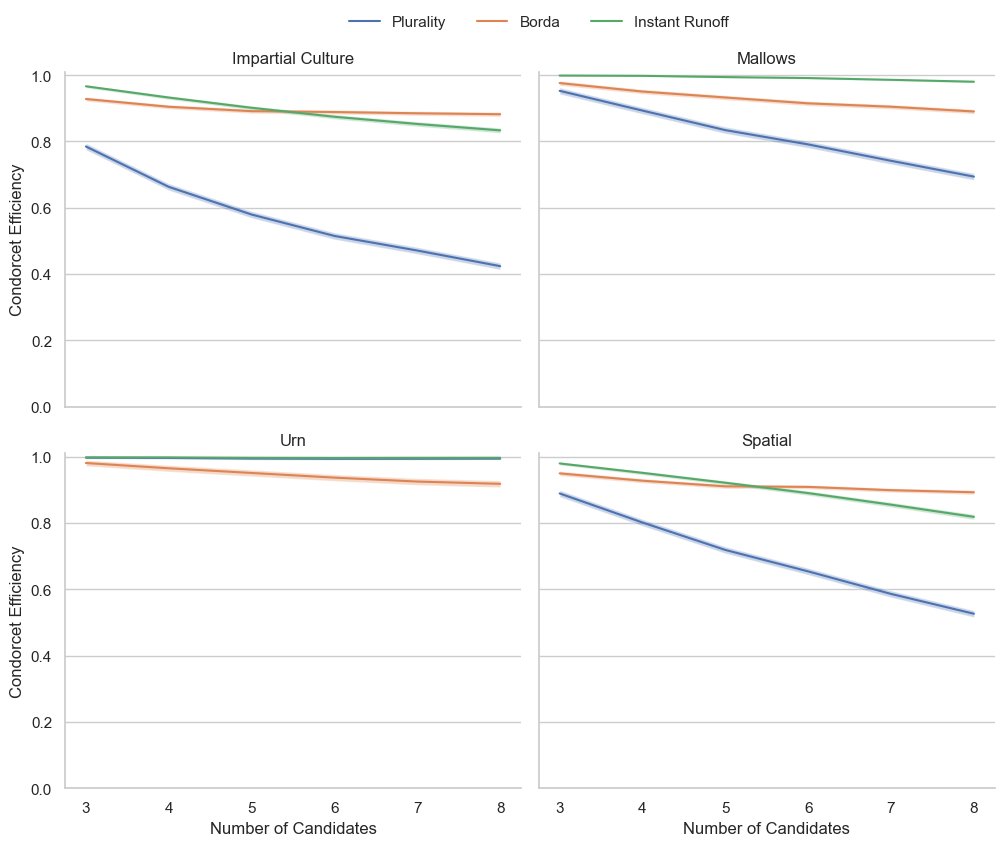

In [151]:
import seaborn as sns   

sns.set_theme(style="whitegrid")
df['num_candidates'] = df['num_candidates'].astype(str)
g = sns.FacetGrid(df, col='prob_model', col_wrap=2, height=4, aspect=1.25, margin_titles=True)

def plot_with_error_bands(data, **kwargs):
    for method in data['voting_method'].unique():
        method_data = data[data['voting_method'] == method]
        plt.plot(method_data['num_candidates'], method_data['condorcet_efficiency'], label=method)
        plt.fill_between(
            method_data['num_candidates'], 
            method_data['condorcet_efficiency'] - method_data['error'],
            method_data['condorcet_efficiency'] + method_data['error'], 
            alpha=0.3
        )
        plt.ylim(0, 1.01)
        plt.grid(axis='x')

g.map_dataframe(plot_with_error_bands)
g.set_axis_labels('Number of Candidates', 'Condorcet Efficiency')
plt.legend(loc='upper center', bbox_to_anchor=(0.0, 2.35), ncol=3, frameon=False)
g.set_titles(row_template='Number of Voters: {row_name}', col_template='{col_name}')
plt.savefig('condorcet_efficiency.pdf', bbox_inches='tight')
plt.show()


In [152]:
from pref_voting.analysis import binomial_confidence_interval
from pref_voting.variable_candidate_axioms import immunity_to_spoilers

min_error = 0.01  
min_num_samples = 1000
max_num_samples = 100_000

axiom = immunity_to_spoilers
voting_methods = [plurality, borda, instant_runoff]

num_candidates = 4
num_voters = 11

has_violation = {vm.name: [] for vm in voting_methods} 
num_samples = 0
error_ranges = []

while num_samples < min_num_samples or (any([(err[1] - err[0]) > min_error for err in error_ranges]) and num_samples < max_num_samples):

    num_samples += 1
    prof = generate_profile(num_candidates, num_voters)
    
    for vm in voting_methods: 
        has_violation[vm.name].append(axiom.has_violation(prof, vm))

    error_ranges = [binomial_confidence_interval(has_violation[vm.name]) 
                    if len(has_violation[vm.name]) > 0 else (0, np.inf) 
                    for vm in voting_methods]

print(f"For {num_samples} samples:\n")

for vm in voting_methods: 
    print(f"The percentage of violations of {axiom.name} for {vm.name} is {np.mean(elect_condorcet_winner[vm.name])}")
    err = binomial_confidence_interval(elect_condorcet_winner[vm.name])
    print(f"\tError: {err[1]-err[0]}")


For 28847 samples:

The percentage of violations of Immunity to Spoilers for Plurality is 0.6189516129032258
	Error: 0.049982799732078864
The percentage of violations of Immunity to Spoilers for Borda is 0.8440860215053764
	Error: 0.0375200564685606
The percentage of violations of Immunity to Spoilers for Instant Runoff is 0.9079301075268817
	Error: 0.030052969495698245
